#### Customer reviews data clean, test, train
### Data source: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Weronika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Weronika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Weronika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Training data

In [101]:
train_path = 'C:/Users/Weronika/Desktop/IT/DS Projects/Cust reviews/train.csv'

In [102]:
train_data = pd.read_csv(train_path, header=None)
train_data.columns = ["overall", "review", "reviewText"]

In [103]:
train_data.head()

overall                                             review  \
0        2                     Stuning even for the non-gamer   
1        2              The best soundtrack ever to anything.   
2        2                                           Amazing!   
3        2                               Excellent Soundtrack   
4        2  Remember, Pull Your Jaw Off The Floor After He...   

                                          reviewText  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...

In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   review      object
 2   reviewText  object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [105]:
train_data.describe(include='all')

overall        review  \
count   3600000.0       3599793   
unique        NaN       2628752   
top           NaN  Disappointed   
freq          NaN          9623   
mean          1.5           NaN   
std           0.5           NaN   
min           1.0           NaN   
25%           1.0           NaN   
50%           1.5           NaN   
75%           2.0           NaN   
max           2.0           NaN   

                                               reviewText  
count                                             3600000  
unique                                            3594783  
top     I bought a QPS back in April, I had configurat...  
freq                                                   15  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [ ]:
train_data = train_data.drop_duplicates()

In [106]:
train_columns = train_data.columns
train_columns

Index(['overall', 'review', 'reviewText'], dtype='object')

In [107]:
missing_values_train = train_data.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
missing_values_train.sort_values(ascending=False, inplace=True)
print("Missing values in train data:\n", missing_values_train)

Missing values in train data:
 review    207
dtype: int64


In [108]:
num_cols_train = train_data.select_dtypes(include=[np.number]).columns
train_data[num_cols_train] = train_data[num_cols_train].fillna(train_data[num_cols_train].median())

In [109]:
cat_cols_train = train_data.select_dtypes(include=['object']).columns
train_data[cat_cols_train] = train_data[cat_cols_train].fillna(train_data[cat_cols_train].mode().iloc[0])

In [110]:
print(train_data.isnull().sum())

overall       0
review        0
reviewText    0
dtype: int64


#### Test Data

In [111]:
test_path = 'C:/Users/Weronika/Desktop/IT/DS Projects/Cust reviews/test.csv'

In [112]:
test_data = pd.read_csv(test_path, header=None)
test_data.columns = ["overall", "review", "reviewText"]

In [113]:
test_data.head()

overall                                             review  \
0        2                                           Great CD   
1        2  One of the best game music soundtracks - for a...   
2        1                   Batteries died within a year ...   
3        2              works fine, but Maha Energy is better   
4        2                       Great for the non-audiophile   

                                          reviewText  
0  My lovely Pat has one of the GREAT voices of h...  
1  Despite the fact that I have only played a sma...  
2  I bought this charger in Jul 2003 and it worke...  
3  Check out Maha Energy's website. Their Powerex...  
4  Reviewed quite a bit of the combo players and ...

In [114]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     400000 non-null  int64 
 1   review      399976 non-null  object
 2   reviewText  400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [115]:
test_columns = test_data.columns
test_columns

Index(['overall', 'review', 'reviewText'], dtype='object')

In [116]:
test_data = test_data.drop_duplicates()

In [117]:
missing_values_test = test_data.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
missing_values_test.sort_values(ascending=False, inplace=True)
print("Missing values in test data:\n", missing_values_test)

Missing values in test data:
 review    24
dtype: int64


In [118]:
num_cols_test = test_data.select_dtypes(include=[np.number]).columns
test_data[num_cols_test] = test_data[num_cols_test].fillna(test_data[num_cols_test].median())

In [119]:
cat_cols_test = test_data.select_dtypes(include=['object']).columns
test_data[cat_cols_test] = test_data[cat_cols_test].fillna(test_data[cat_cols_test].mode().iloc[0])

In [120]:
print(test_data.isnull().sum())

overall       0
review        0
reviewText    0
dtype: int64


#### TrainingD - EDA

In [121]:
def convert_rating_to_sentiment(rating):
    if rating <= 2:
        return 0
    elif rating >= 4:
        return 1
    else:
        return np.nan  # Del neutral reviews

train_data['sentiment'] = train_data['overall'].apply(convert_rating_to_sentiment)
test_data['sentiment'] = test_data['overall'].apply(convert_rating_to_sentiment)

train_data = train_data.dropna(subset=['sentiment'])
test_data = test_data.dropna(subset=['sentiment'])


In [122]:
review_column = 'reviewText'
rating_column = 'overall'

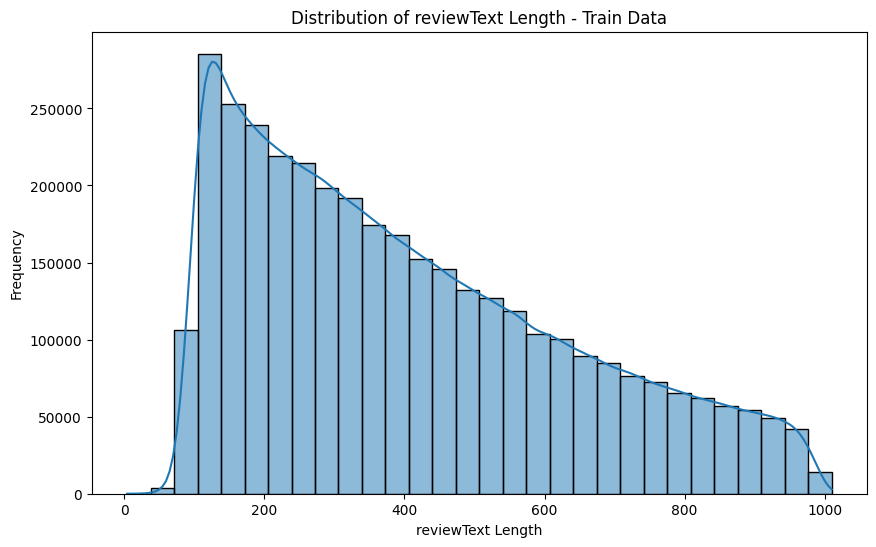

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data[review_column].str.len(), bins=30, kde=True)
plt.title(f"Distribution of {review_column} Length - Train Data")
plt.xlabel(f"{review_column} Length")
plt.ylabel("Frequency")
plt.show()

#### TestD - EDA

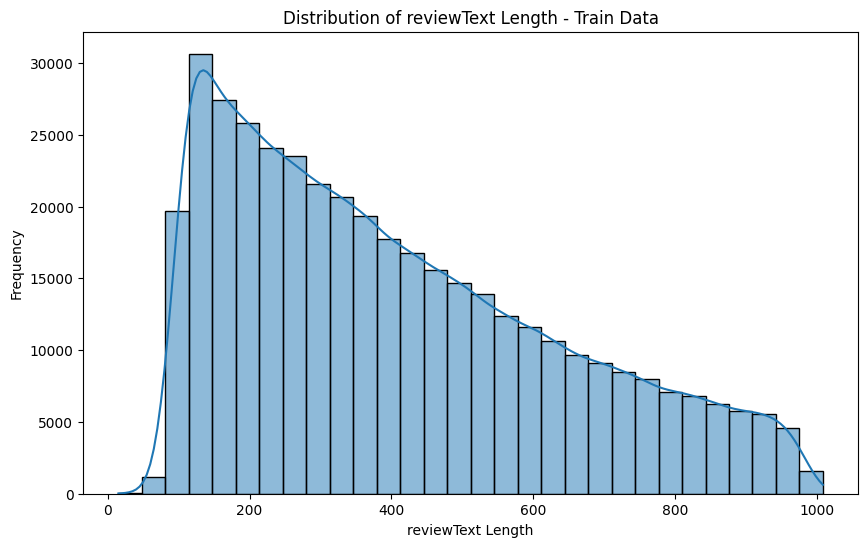

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(test_data[review_column].str.len(), bins=30, kde=True)
plt.title(f"Distribution of {review_column} Length - Train Data")
plt.xlabel(f"{review_column} Length")
plt.ylabel("Frequency")
plt.show()

### Tekst fill - both sets TT

In [125]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

train_data['cleaned_review'] = train_data[review_column].apply(preprocess_text)
test_data['cleaned_review'] = test_data[review_column].apply(preprocess_text)
train_data.head()
test_data.head()


overall                                             review  \
0        2                                           Great CD   
1        2  One of the best game music soundtracks - for a...   
2        1                   Batteries died within a year ...   
3        2              works fine, but Maha Energy is better   
4        2                       Great for the non-audiophile   

                                          reviewText  sentiment  \
0  My lovely Pat has one of the GREAT voices of h...          0   
1  Despite the fact that I have only played a sma...          0   
2  I bought this charger in Jul 2003 and it worke...          0   
3  Check out Maha Energy's website. Their Powerex...          0   
4  Reviewed quite a bit of the combo players and ...          0   

                                      cleaned_review  
0  lovely pat one great voice generation listened...  
1  despite fact played small portion game music h...  
2  bought charger jul worked ok design nice conve...  
3  check maha energy website powerex charger work...  
4  reviewed quite bit combo player hesitant due u...

#### Prediction modeling

In [126]:
X_train = train_data['cleaned_review']
y_train = train_data['sentiment']
X_test = test_data['cleaned_review']

In [127]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [128]:
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0